# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Task 1: Importing Data (Data Loading) 

In [2]:
train_data = pd.read_csv('Train_data.csv')

# Task 2: Exploratory Data Analysis

In [3]:
train_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

### Observations
*  There are 3202 records in the train dataset
*  The dataset has both categorical and numerical data
*  There are some missing data

In [5]:
train_data.isnull().sum() / len(train_data) * 100

age                     0.000000
job_type                0.354610
marital_status          0.000000
education_level         3.642811
default_or_not          0.000000
balance_amt             0.000000
household_insurance     0.000000
car_loan                0.000000
communication          17.504836
last_contact_day        0.000000
last_contact_month      0.000000
no_of_contacts          0.000000
days_passed             0.000000
prev_attempts           0.000000
Outcome                75.789813
call_start              0.000000
call_end                0.000000
car_insurance           0.000000
dtype: float64

* 'Outcome' column has 75% missing data

In [6]:
train_data.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance
count,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000
mean,41.325847,0.014507,1543.067240,0.465184,0.114442,15.353965,2.356867,52.419084,0.792392,0.567376
std,11.517698,0.119587,3301.474598,0.498867,0.318399,8.164255,2.594238,109.231364,2.224740,0.495520
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,123.821352,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,589.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,0.000000,1696.000000,1.000000,0.000000,21.000000,3.000000,56.750000,1.000000,1.000000
max,92.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


### Observations
*  Average age of the customers is 41 years. The oldest customer was 92 years old.
*  Maximum balance amount of customer in bank is 52587 while there are some customers with negative bank balance.

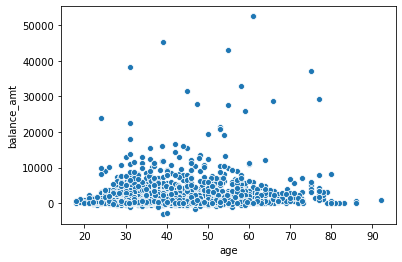

In [7]:
sns.scatterplot(x=train_data.age, y = train_data.balance_amt)

### Observations
As we can see in the above plot, there are some outliers. Some customers with average age have balance amount more then 40000.

# Task 3: Data Cleaning & Data Pre-processing
It's a good practice to split the data into train and test set, and separate the data into dependent and independent variables before performing some data cleaning or data preprocessing.

In [8]:
# separate dependent and independent variables
x = train_data.drop('car_insurance', axis = 1)
y = train_data.car_insurance

In [9]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [10]:
# imputing missing data
x_train.job_type = x_train.job_type.fillna(x_train.job_type.mode().iloc[0])
x_test.job_type = x_test.job_type.fillna(x_test.job_type.mode().iloc[0])

x_train.education_level = x_train.education_level.fillna(x_train.education_level.mode().iloc[0])
x_test.education_level = x_test.education_level.fillna(x_test.education_level.mode().iloc[0])

x_train.communication = x_train.communication.fillna(x_train.communication.mode().iloc[0])
x_test.communication = x_test.communication.fillna(x_test.communication.mode().iloc[0])

In [11]:
# droping unnecessary columns or columns with high missing data
x_train.drop(['Outcome', 'call_start', 'call_end'], axis = 1, inplace = True)
x_test.drop(['Outcome', 'call_start', 'call_end'], axis = 1, inplace = True)

In [12]:
# converting categorical data to numerical (one hot encoding using pd.get_dummies())
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Task 4: Machine Learning Model Building & Model Evaluation

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# on train data set
accuracy_score(y_train, lr.predict(x_train)) * 100

65.03915246430216

In [18]:
# on test data set
accuracy_score(y_test, lr.predict(x_test)) * 100

64.23200859291084

# Task 5: Prediction for Test Dataset (Provided By DPhi)

In [19]:
# load the test dataset
test_data = pd.read_csv('Test_data.csv')

In [20]:
# imputing missing data
test_data.job_type = test_data.job_type.fillna(test_data.job_type.mode().iloc[0])

test_data.education_level = test_data.education_level.fillna(test_data.education_level.mode().iloc[0])

test_data.communication = test_data.communication.fillna(test_data.communication.mode().iloc[0])

In [21]:
# droping unnecessary columns or columns with high missing data
test_data.drop(['Outcome', 'call_start', 'call_end'], axis = 1, inplace = True)

In [22]:
# converting categorical data to numerical (one hot encoding using pd.get_dummies())
test_data = pd.get_dummies(test_data)

### Making Predictions

In [23]:
predictions = lr.predict(test_data)

### Save prediciton results locally via jupyter notebook

In [24]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.

### Save prediction results locally via Google Colab notebook

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', inplace = False)
files.download('prediction_results.csv')